In [165]:
import numpy as np
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import pybedtools as pbt

plt.style.use('fivethirtyeight')
def clean_axis(ax):
    ax.xaxis.set_tick_params(labelsize=11)
    ax.yaxis.set_tick_params(labelsize=11)
    for i in ['top', 'bottom', 'left', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(which='major', linestyle='--', alpha=0.5)
    return True

In [5]:
chroms = ['chr' + str(x) for x in range(1, 23)] + ['chrX', 'chrY']
cancers = ['BRC', 'GBM', 'HN', 'LUAD', 'OV']

In [112]:
def bed_reader_to_chrom(fn):
    chroms = ['chr' + str(x) for x in range(1, 23)] + ['chrX', 'chrY']
    chrom_dict = {x:[] for x in chroms}
    with open(fn) as h:
        for l in h:
            c  = l.rstrip('\n').split('\t')
            try:
                chrom_dict[c[0]].append(int(c[1]))
            except KeyError:
                pass
    return chrom_dict

def load_snipr(chrom, coords):
    pos = np.load('../data/sniprq_scores/%s_positive.npy' % chrom, mmap_mode='r')
    neg = np.load('../data/sniprq_scores/%s_negative.npy' % chrom, mmap_mode='r')
    res = []
    offset = 5000
    for c in coords:
        a = pos[c-offset:c+offset+1]+neg[c-offset:c+offset+1]
        if len(a) == offset*2+1:
            res.append(a)
    return res
    
data = []
for cancer in cancers:
    cancer_profiles = []
    fns = sorted(glob.glob('../data/breakpoints/%s*' % cancer))
    temp = {x:[] for x in chroms}
    for fn in fns:
        res = bed_reader_to_chrom(fn)
        for chrom in res:
            temp[chrom].extend(res[chrom])
    for chrom in tqdm(temp, desc=cancer):
        cancer_profiles.extend(load_snipr(chrom, temp[chrom]))
    cancer_profiles = np.array(cancer_profiles)
    data.append(cancer_profiles)

OV: 100%|██████████| 24/24 [00:38<00:00,  1.57s/it]


In [ ]:
from collections import Counter

(22076, 10001)


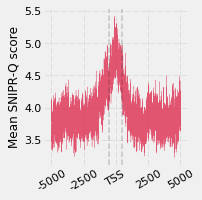

(55874, 10001)


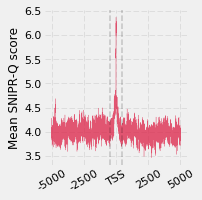

(22154, 10001)


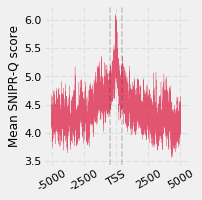

(36086, 10001)


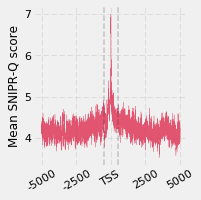

(56431, 10001)


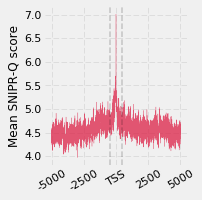

In [146]:
for c,n in zip(data, cancers):
    fig, ax = plt.subplots(1, 1, figsize=(3,3))
    ax.plot(c.mean(axis=0), lw=0.3, color='crimson', alpha=0.7)
    ax.set_xticks([0, 2500, 5000, 7500, 10000])
    ax.set_xticklabels([-5000, -2500, 0, 2500, 5000], rotation=30)
    ax.axvline(4500, lw=0.4, ls='--', alpha=0.7, color='k')
    ax.axvline(5500, lw=0.4, ls='--', alpha=0.7, color='k')
    ax.set_ylabel('Mean SNIPR-Q score', fontsize=12)
    clean_axis(ax)
    print (c.shape)
    plt.tight_layout()
    plt.savefig('../images/breakpoints_5kb_%s.svg' % n, transparent=True, edgecolor='none')
    plt.show()

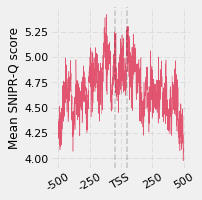

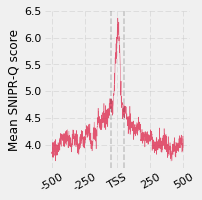

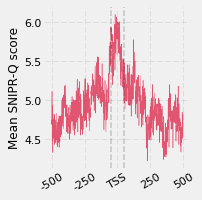

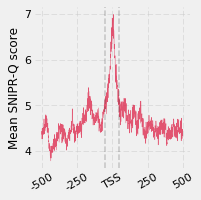

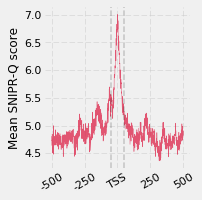

In [149]:
for c,n in zip(data, cancers):
    fig, ax = plt.subplots(1, 1, figsize=(3,3))
    ax.plot(c.mean(axis=0)[4500:5500], lw=0.5, color='crimson', alpha=0.7)
    ax.set_xticks([0, 250, 500, 750, 1000])
    ax.set_xticklabels([-500, -250, 0, 250, 500], rotation=30)
    ax.axvline(450, lw=0.4, ls='--', alpha=0.7, color='k')
    ax.axvline(550, lw=0.4, ls='--', alpha=0.7, color='k')
    ax.set_ylabel('Mean SNIPR-Q score', fontsize=12)
    clean_axis(ax)
    plt.tight_layout()
    plt.savefig('../images/breakpoints_500bp_%s.svg' % n,
                transparent=True, edgecolor='none')
    plt.show()

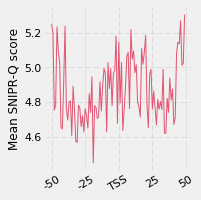

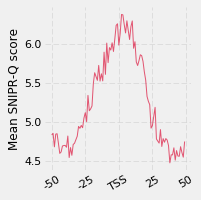

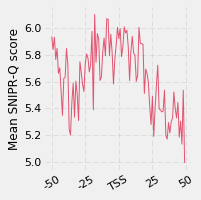

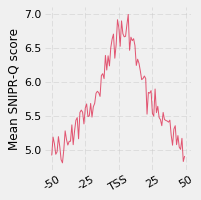

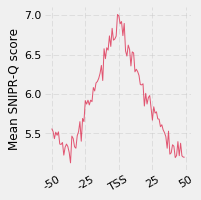

In [178]:
for c,n in zip(data, cancers):
    fig, ax = plt.subplots(1, 1, figsize=(3,3))
    ax.plot(c.mean(axis=0)[4950:5050], lw=1, color='crimson', alpha=0.7)
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_xticklabels([-50, -25, 0, 25, 50], rotation=30)
    ax.set_ylabel('Mean SNIPR-Q score', fontsize=12)
    clean_axis(ax)
    plt.tight_layout()
    plt.savefig('../images/breakpoints_50bp_%s.svg' % n,
                transparent=True, edgecolor='none')
    plt.show()

In [176]:
def bed_reader_to_chrom(fn):
    chroms = ['chr' + str(x) for x in range(1, 23)] + ['chrX', 'chrY']
    chrom_dict = {x:[] for x in chroms}
    bed = pbt.BedTool(fn)
    bed = bed.shuffle(g='/home/parashar/scratch/hg19_resource/hg19.genome', chrom=True)
    for l in bed:
        c = str(l).rstrip('\n').split('\t')
        try:
            chrom_dict[c[0]].append(int(c[1]))
        except KeyError:
            pass
    return chrom_dict

def load_snipr(chrom, coords):
    pos = np.load('../data/sniprq_scores/%s_positive.npy' % chrom, mmap_mode='r')
    neg = np.load('../data/sniprq_scores/%s_negative.npy' % chrom, mmap_mode='r')
    res = []
    offset = 5000
    for c in coords:
        a = pos[c-offset:c+offset+1]+neg[c-offset:c+offset+1]
        if len(a) == offset*2+1:
            res.append(a)
    return res
    
random_data = []
for cancer in cancers:
    cancer_profiles = []
    fns = sorted(glob.glob('../data/breakpoints/%s*' % cancer))
    temp = {x:[] for x in chroms}
    for fn in fns:
        res = bed_reader_to_chrom(fn)
        for chrom in res:
            temp[chrom].extend(res[chrom])
    for chrom in tqdm(temp, desc=cancer):
        cancer_profiles.extend(load_snipr(chrom, temp[chrom]))
    cancer_profiles = np.array(cancer_profiles)
    random_data.append(cancer_profiles)

OV: 100%|██████████| 24/24 [00:46<00:00,  1.85s/it]


(22075, 10001)


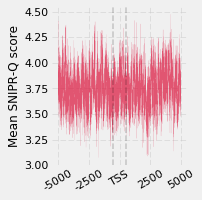

(55871, 10001)


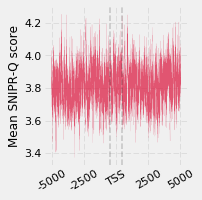

(22154, 10001)


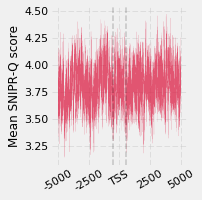

(36083, 10001)


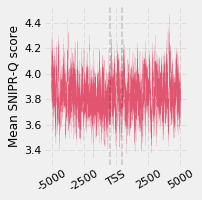

(56427, 10001)


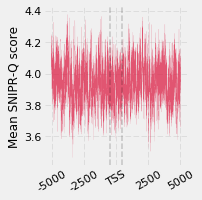

In [181]:
for c,n in zip(random_data, cancers):
    fig, ax = plt.subplots(1, 1, figsize=(3,3))
    ax.plot(c.mean(axis=0), lw=0.1, color='crimson', alpha=0.7)
    ax.set_xticks([0, 2500, 5000, 7500, 10000])
    ax.set_xticklabels([-5000, -2500, 'TSS', 2500, 5000], rotation=30)
    ax.axvline(4500, lw=0.4, ls='--', alpha=0.7, color='k')
    ax.axvline(5500, lw=0.4, ls='--', alpha=0.7, color='k')
    ax.set_ylabel('Mean SNIPR-Q score', fontsize=12)
    clean_axis(ax)
    print (c.shape)
    plt.tight_layout()
    #plt.savefig('../images/breakpoints_5kb_%s.svg' % n, transparent=True, edgecolor='none')
    plt.show()

In [218]:
def bed_reader_to_chrom(fn):
    chroms = ['chr' + str(x) for x in range(1, 23)] + ['chrX', 'chrY']
    chrom_dict = {x:[] for x in chroms}
    with open(fn) as h:
        for l in h:
            c  = l.rstrip('\n').split('\t')
            try:
                chrom_dict[c[0]].append(int(c[1]))
            except KeyError:
                pass
    return chrom_dict

def load_g4_motifs(chrom, coords):
    g4 = pbt.BedTool('/home/parashar/scratch/quadruplexes/hg19/g3_25_3_%s_nov.bed' % chrom)
    break_bed = []
    offset = 5000
    for i in coords:
        break_bed.append('\t'.join([chrom, str(i-offset), str(i+offset)]))
    break_bed = pbt.BedTool('\n'.join(break_bed), from_string=True)
    intersected = break_bed.intersect(g4, wao=True)
    prev = (0, 0)
    all_overlap = []
    a = []
    for i in intersected:
        c = str(i).split('\t')
        s1, e1 = int(c[1]), int(c[2])
        s2, e2 = int(c[4]), int(c[5])
        if (s1, e1) != prev:
            all_overlap.append(a)
            a = np.zeros(offset*2)
        if s2 >= s1:
            a[s2-s1:min(offset*2, e2-s1)] = 1
        else:
            a[:e2-s1] = 1
        prev = (s1, e1)
    all_overlap.append(a)
    return all_overlap[1:]
    
bulged_g4_data = []
for cancer in cancers:
    cancer_profiles = []
    fns = sorted(glob.glob('../data/breakpoints/%s*' % cancer))
    temp = {x:[] for x in chroms}
    for fn in fns:
        res = bed_reader_to_chrom(fn)
        for chrom in res:
            temp[chrom].extend(res[chrom])
    for chrom in tqdm(temp, desc=cancer):
        cancer_profiles.extend(load_g4_motifs(chrom, temp[chrom]))
    cancer_profiles = np.array(cancer_profiles)
    bulged_g4_data.append(cancer_profiles)

OV: 100%|██████████| 24/24 [03:00<00:00,  7.19s/it]


(22069, 10000)


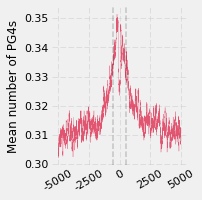

(55800, 10000)


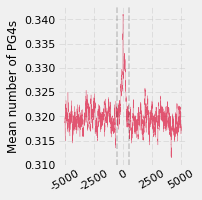

(22089, 10000)


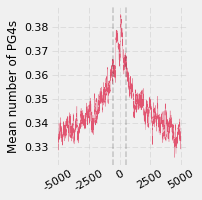

(36014, 10000)


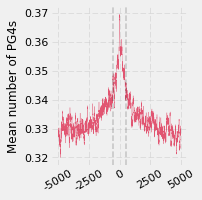

(56243, 10000)


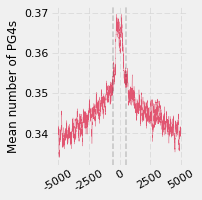

In [220]:
for c,n in zip(bulged_g4_data, cancers):
    fig, ax = plt.subplots(1, 1, figsize=(3,3))
    ax.plot(c.mean(axis=0), lw=0.3, color='crimson', alpha=0.7)
    ax.set_xticks([0, 2500, 5000, 7500, 10000])
    ax.set_xticklabels([-5000, -2500, 0, 2500, 5000], rotation=30)
    ax.axvline(4500, lw=0.4, ls='--', alpha=0.7, color='k')
    ax.axvline(5500, lw=0.4, ls='--', alpha=0.7, color='k')
    ax.set_ylabel('Mean number of PG4s', fontsize=12)
    clean_axis(ax)
    print (c.shape)
    plt.tight_layout()
    plt.savefig('../images/breakpoints_Bulged_G4_5kb_%s.svg' % n, transparent=True, edgecolor='none')
    plt.show()

(22069, 10000)


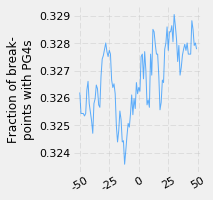

(55800, 10000)


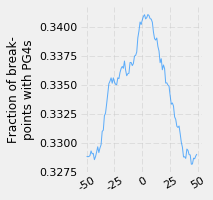

(22089, 10000)


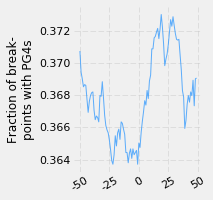

(36014, 10000)


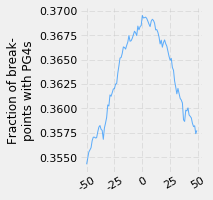

(56243, 10000)


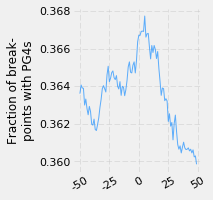

In [230]:
for c,n in zip(bulged_g4_data, cancers):
    fig, ax = plt.subplots(1, 1, figsize=(3.15,3))
    ax.plot(c.mean(axis=0)[4950:5050], lw=1, color='dodgerblue', alpha=0.7)
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_xticklabels([-50, -25, 0, 25, 50], rotation=30)
    ax.set_ylabel('Fraction of break-\npoints with PG4s', fontsize=12)
    clean_axis(ax)
    print (c.shape)
    plt.tight_layout()
    plt.savefig('../images/breakpoints_Bulged_G4_50b_%s.svg' % n, transparent=True, edgecolor='none')
    plt.show()

In [238]:
def bed_reader_to_chrom(fn):
    chroms = ['chr' + str(x) for x in range(1, 23)] + ['chrX', 'chrY']
    chrom_dict = {x:[] for x in chroms}
    with open(fn) as h:
        for l in h:
            c  = l.rstrip('\n').split('\t')
            try:
                chrom_dict[c[0]].append(int(c[1]))
            except KeyError:
                pass
    return chrom_dict

def load_snipr(chrom, coords):
    pos = np.load('../data/sniprq_scores/%s_positive.npy' % chrom, mmap_mode='r')
    neg = np.load('../data/sniprq_scores/%s_negative.npy' % chrom, mmap_mode='r')
    res = []
    offset = 5000
    for c in coords:
        a = np.zeros(offset*2)
        x = np.where(pos[c-offset:c+offset] > 25)[0]
        try:
            a[x[0]: x[-1]] += 1
        except IndexError:
            pass
        x = np.where(neg[c-offset:c+offset] > 25)[0]
        try:
            a[x[0]: x[-1]] += 1
        except IndexError:
            pass
        res.append(a)
    return res
    
data_cutoff = []
for cancer in cancers:
    cancer_profiles = []
    fns = sorted(glob.glob('../data/breakpoints/%s*' % cancer))
    temp = {x:[] for x in chroms}
    for fn in fns:
        res = bed_reader_to_chrom(fn)
        for chrom in res:
            temp[chrom].extend(res[chrom])
    for chrom in tqdm(temp, desc=cancer):
        cancer_profiles.extend(load_snipr(chrom, temp[chrom]))
    cancer_profiles = np.array(cancer_profiles)
    data_cutoff.append(cancer_profiles)

OV: 100%|██████████| 24/24 [00:43<00:00,  1.80s/it]


(22077, 10000)


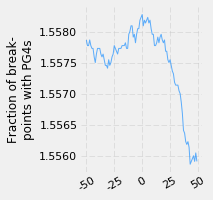

(55874, 10000)


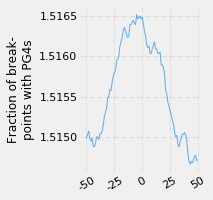

(22154, 10000)


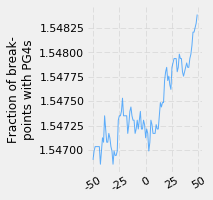

(36086, 10000)


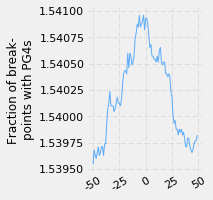

(56432, 10000)


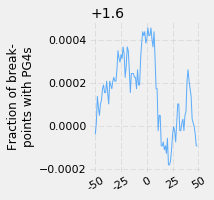

In [239]:
for c,n in zip(data_cutoff, cancers):
    fig, ax = plt.subplots(1, 1, figsize=(3.15,3))
    ax.plot(c.mean(axis=0)[4950:5050], lw=1, color='dodgerblue', alpha=0.7)
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_xticklabels([-50, -25, 0, 25, 50], rotation=30)
    ax.set_ylabel('Fraction of break-\npoints with PG4s', fontsize=12)
    clean_axis(ax)
    print (c.shape)
    plt.tight_layout()
    plt.savefig('../images/breakpoints_Cutoff_50b_%s.svg' % n,
                transparent=True, edgecolor='none')
    plt.show()